In [1]:
import matplotlib.pyplot as plt
import numpy as np
from typing import List, Tuple
import random
from time import perf_counter_ns
import networkx as nx
import heapq

INF = float('inf') # Infinity

# Context
> n the Dijkstra’s algorithm, the choice of the input graph representation and the priority queue implementation will affect its time complexity

In [2]:
def generate_graph(N: int, p: float = 0.2, undirected: bool = False):
    adjacency_matrix = [[INF] * N for _ in range(N)]
    E = []
    for i in range(N):
        adjacency_matrix[i][i] = 0
        if undirected:
            for j in range(i + 1, N):
                if random.random() < p:
                    adjacency_matrix[i][j] = random.randint(1, 9)
                    E.append((i, j, adjacency_matrix[i][j]))
                    # Symnmetric matrix since undirected graph.
                    adjacency_matrix[j][i] = adjacency_matrix[i][j]
        else:
            for j in range(N):
                if i != j and random.random() < p:
                    adjacency_matrix[i][j] = random.randint(1, 9)
                    E.append((i, j, adjacency_matrix[i][j]))
    return adjacency_matrix, E

def to_adj_lists(adjacency_matrix: List[List[int]]):
    lists = []
    for i in range(len(adjacency_matrix)):
        neighbours = []
        for j in range(len(adjacency_matrix)):
            if i != j and adjacency_matrix[i][j] != INF:
                neighbours.append((j, adjacency_matrix[i][j])) 
        lists.append(neighbours)
    return lists

def to_edges(adjacency_matrix: List[List[int]]):
    edges = []
    for i in range(len(adjacency_matrix)):
        for j in range(len(adjacency_matrix[i])):
            if adjacency_matrix[i][j] != 0 and adjacency_matrix[i][j] != INF:
                edges.append((i, j, adjacency_matrix[i][j]))
    return edges

# [(vertex, weight)]
def to_edges_from_adj_lists(adjacency_lists: List[List[Tuple[int, int]]]):
    edges = []
    for i in range(adjacency_lists):
        for (j, weight) in adjacency_lists[i]:
            edges.append((i, j, weight))
    return edges

def print_adjacency_matrix(adjacency_matrix: List[List[int]]):
    for row in adjacency_matrix:
        for val in row:
            if val == INF:
                print(" ", end=" ")
            else:
                print(val, end=" ")
        print()

def print_adjacency_lists(adjacency_matrix: List[List[int]]):
    for row in adjacency_matrix:
        for val in row:
            if val == INF:
                print(" ", end=" ")
            else:
                print(val, end=" ")
        print()
        
def draw_graph(E: List[Tuple[int, int, int]], 
               highlighted_route: List[Tuple[int, int, int]] | None = None,
               title: str = "Graph"):
    G = nx.DiGraph()
    G.add_weighted_edges_from(E)
    pos = nx.spring_layout(G, seed=42)
    plt.figure(figsize=(12, 8))

    # Draw directed edges with arrows
    nx.draw_networkx_edges(G, pos, edge_color='gray', width=1, alpha=0.6, 
                        arrows=True, arrowsize=40, arrowstyle='->')

    if highlighted_route != None:
        # Draw highlighted edges (thick, red)
        nx.draw_networkx_edges(G, pos, edgelist=highlighted_route, 
                                edge_color='red', width=4, alpha=0.8, arrows=True, arrowsize=20)

    nx.draw_networkx_nodes(G, pos, node_color='lightblue', 
                        node_size=1500, alpha=0.9)
    nx.draw_networkx_labels(G, pos, font_size=12, font_weight='bold')
    edge_labels = nx.get_edge_attributes(G, 'weight')
    nx.draw_networkx_edge_labels(G, pos, edge_labels, font_size=12, label_pos=0.25)

    plt.title(title, size=16)
    plt.axis('off')
    plt.tight_layout()
    plt.show()


# (a) Suppose the input graph G = (V, E) is stored in an adjacency matrix and we use an array for the priority queue. Implement the Dijkstra’s algorithm using this setting and analyze its time complexity with respect to |V| and |E| both theoretically and empirically.

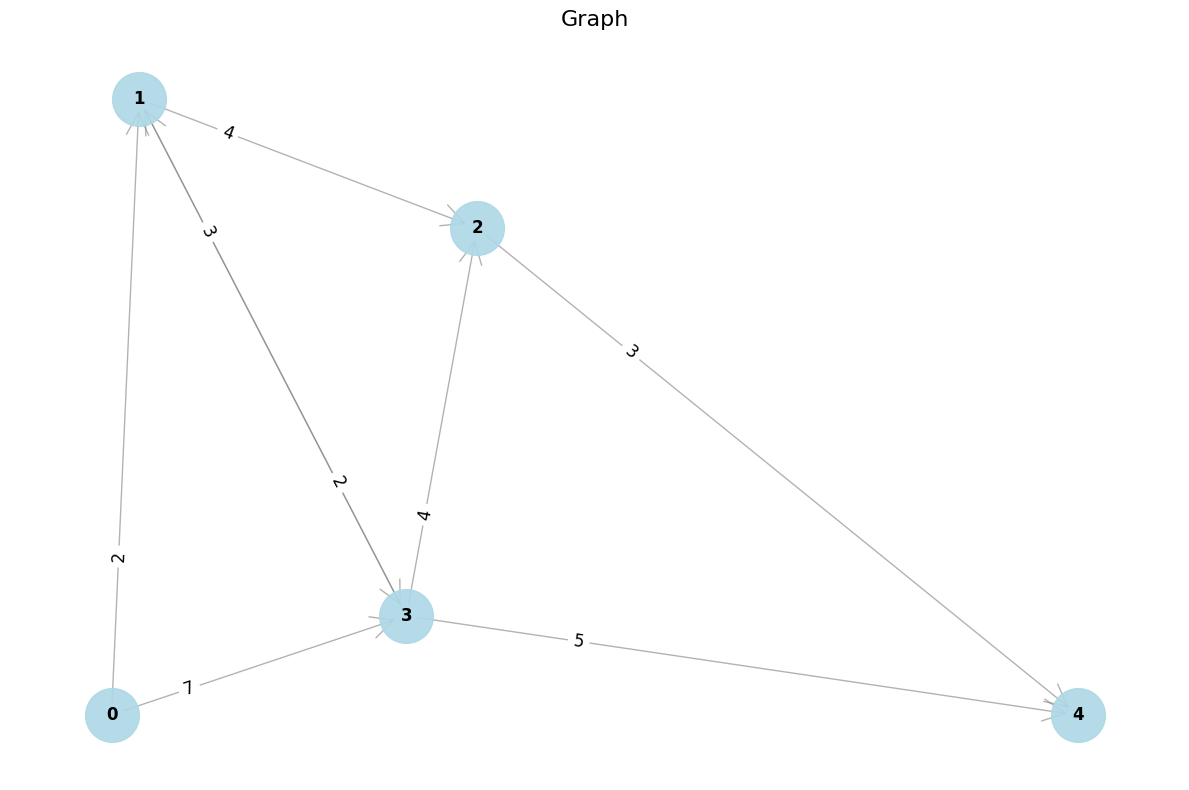

In [3]:
adjacency_matrix = [
  [0, 2, INF, 7, INF],
  [INF, 0, 4, 3, INF],
  [INF, INF, 0, INF, 3],
  [INF, 2, 4, 0, 5],
  [INF, INF, INF, INF, 0],
]

E = to_edges(adjacency_matrix)

draw_graph(E)


In [4]:
def dijkstra_a(adjacency_matrix: List[List[int]], start: int):
    V = {x for x in range(len(adjacency_matrix))}
    visited = set()
    node_parent_and_distances = [
        (INF, None) for _ in range(len(adjacency_matrix))
    ]
    node_parent_and_distances[start] = (0, None)
    while True:
        # Find the node with the smallest distance.
        # Behaves like an array though its a set. since
        # we still need to do linear search to find min.
        considered = V - visited
        # We stop when we are out of options.
        if len(considered) == 0:
            break
        cur = min(considered, key=lambda x: node_parent_and_distances[x][0]) # O(V)

        # Mark as visited
        visited.add(cur)
        
        # Current node's lowest distance
        cur_dist = node_parent_and_distances[cur][0]
        neighbours = adjacency_matrix[cur]
        for i, dist in enumerate(neighbours): # V
            if dist != INF and i not in visited:
                if cur_dist + dist < node_parent_and_distances[i][0]:
                    node_parent_and_distances[i] = (cur_dist + dist, cur)

    return node_parent_and_distances

def get_path_route(node_parent_and_distances: List[Tuple[int, int | None]],
                   end: int):
    # Get route.
    d, prev_node = node_parent_and_distances[end]
    if d == INF:
        return [], INF 
    route = [end]
    while prev_node != None:
        route.append(prev_node)
        _, prev_node = node_parent_and_distances[prev_node]

    route.reverse()
    edge_route = []
    for i in range(1, len(route)):
        edge_route.append((route[i-1], route[i]))
    
    return edge_route, d


[(0, 1), (1, 2), (2, 4)] 9


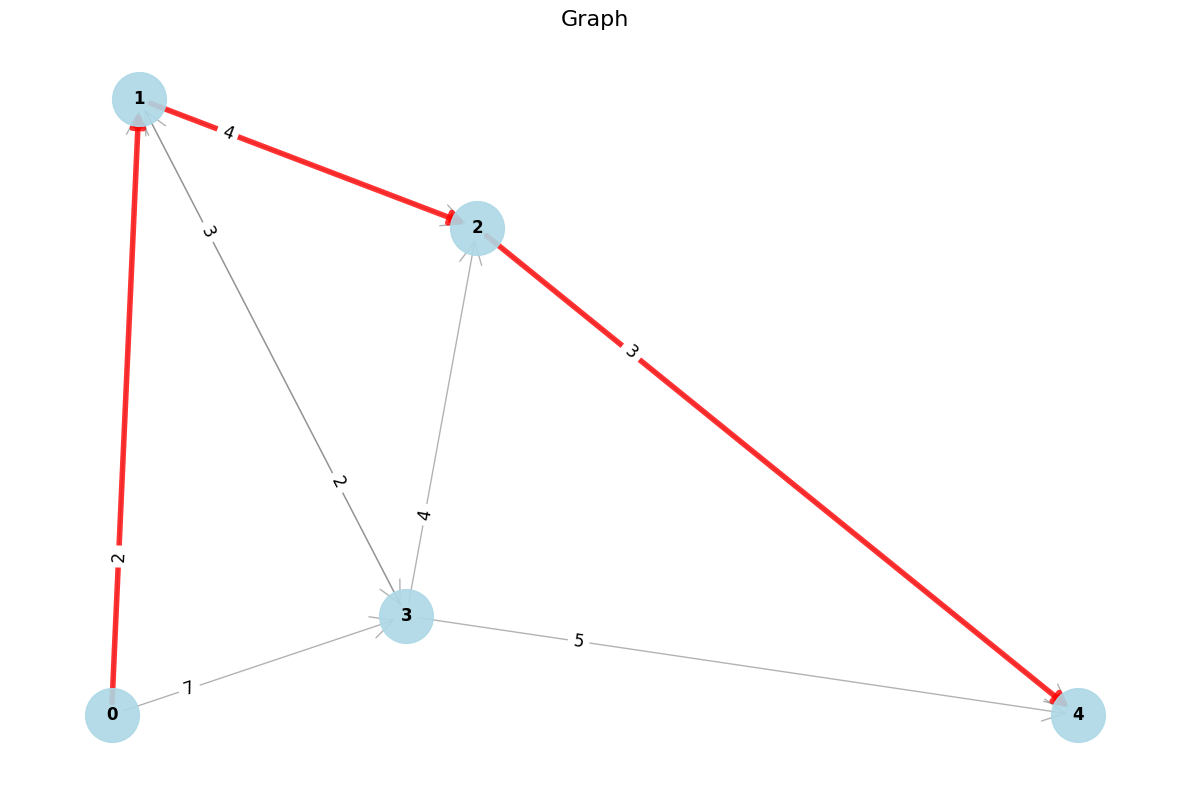

In [5]:
adjacency_matrix = [
  [0, 2, INF, 7, INF],
  [INF, 0, 4, 3, INF],
  [INF, INF, 0, INF, 3],
  [INF, 2, 4, 0, 5],
  [INF, INF, INF, INF, 0],
]

res = dijkstra_a(adjacency_matrix, 0)
route, d = get_path_route(res, 4)
print(route, d)

E = to_edges(adjacency_matrix)
draw_graph(E, route)

[(0, 2), (2, 9), (9, 11)] 9


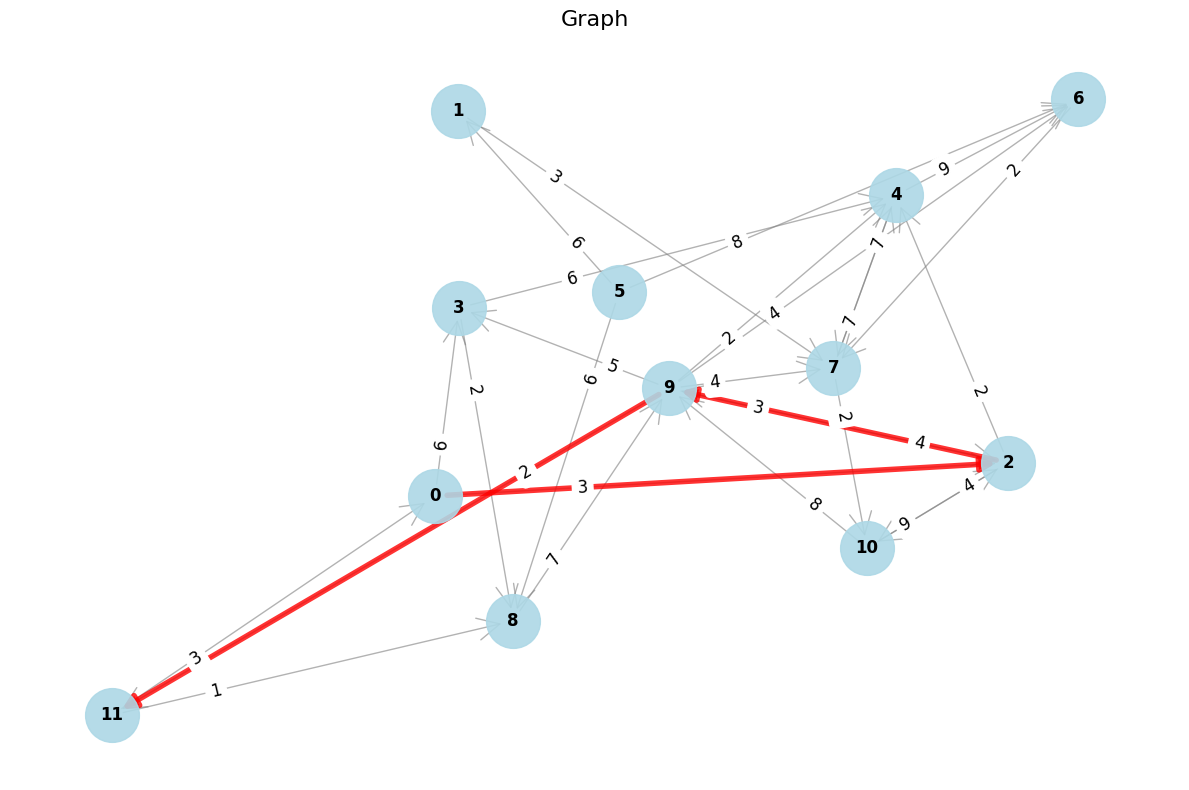

In [6]:
random.seed(69)
N = 12
adjacency_matrix, E = generate_graph(N, p=0.2)

res = dijkstra_a(adjacency_matrix, 0)
route, d = get_path_route(res, N-1)
print(route, d)

E = to_edges(adjacency_matrix)
draw_graph(E, route)

0 2 2 6 9 7 9 9 
3 0 7 5 3 4 9 2 
2 6 0 2 1 4 8 2 
5 9 5 0 2 5 8 8 
9 7 5 7 0 2 9 1 
8 3 6 4 7 0 4 8 
5 9 8 4 9 2 0 3 
9 2 8 9 9 6 7 0 
[(0, 1), (1, 7)] 4


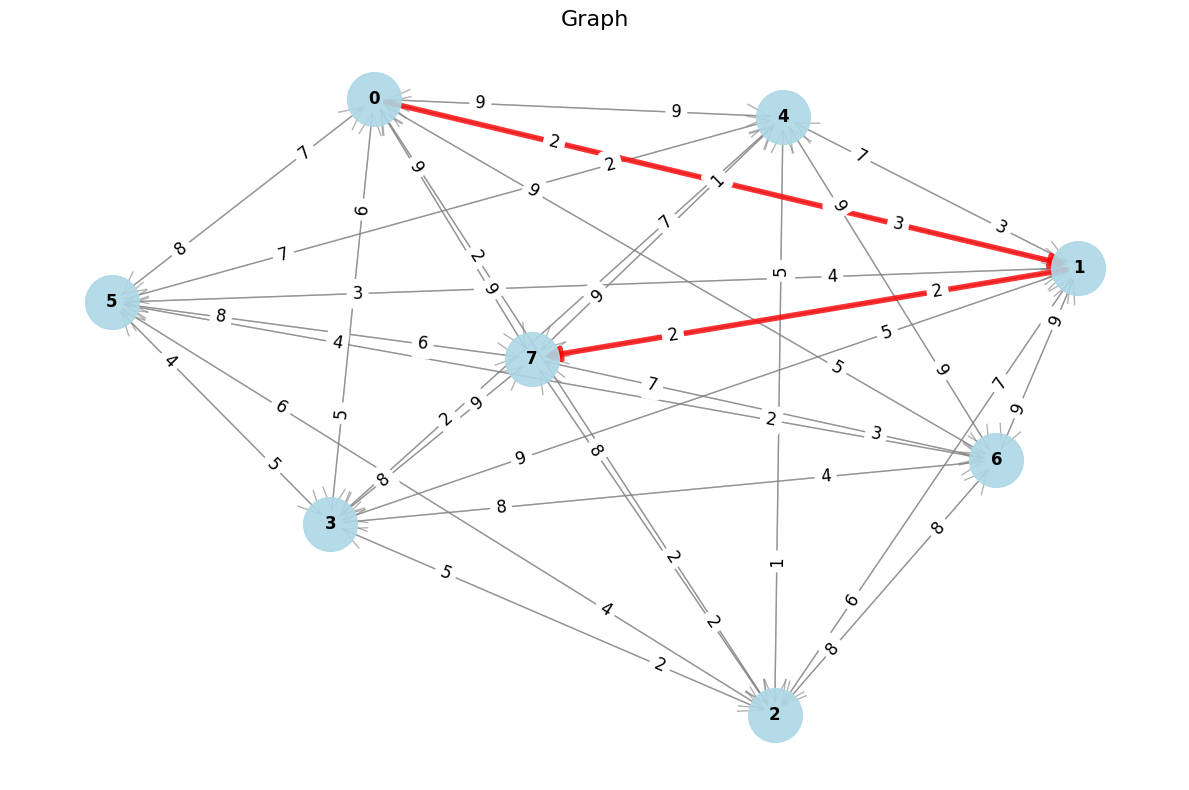

In [7]:
random.seed(69)
N = 8
adjacency_matrix, E = generate_graph(N, p=1) # p=1 -> Complete Digraph
print_adjacency_matrix(adjacency_matrix)

res = dijkstra_a(adjacency_matrix, 0)
route, d = get_path_route(res, N-1)
print(route, d)

E = to_edges(adjacency_matrix)
draw_graph(E, route)

## Theoretical Time Complexity
In the implementation, we are looping until we have exhausted all `V` vertices.
```python
while True: # V
    # here, we are finding the set difference which
    # is also V
    considered = V - visited # V
    if len(considered) == 0:
        break
```

In each loop, we are doing a linear search (up to `V`) for the minimum distance
```python
cur = min(considered, key=lambda x: node_parent_and_distances[x][0]) # O(V)
```

Since we are using an adjacency matrix, we need to loop the entire row (`V` vertices) to identify the edges weights.
```python
cur_dist = node_parent_and_distances[cur][0]
neighbours = adjacency_matrix[cur]
for i, dist in enumerate(neighbours): # V
    if dist != INF and i not in visited:
        if cur_dist + dist < node_parent_and_distances[i][0]:
            node_parent_and_distances[i] = (cur_dist + dist, cur)
```

In the Best Case, we expect to run `V^2`.
In the Worst Case, we expect to run `O(V^2)`.

## Empirical Time Complexity

In [8]:
def generate_dataset(size_samples: List[Tuple[int, int, float]]):
    dataset = []
    for N, number_of_samples, p in size_samples:
        examples = []
        for _ in range(number_of_samples):
            adjacency_matrix, E = generate_graph(N, p)
            examples.append({
                "adjacency_matrix": adjacency_matrix,
                "E": E,
            })
        dataset.append({
            "N": N,
            "examples": examples,
        })
    return dataset

sparse_dataset = generate_dataset([
    (10, 100, 0.2),
    (20, 100, 0.2),
    (30, 100, 0.2),
    (40, 100, 0.2),
    (50, 100, 0.2),
])

dense_dataset = generate_dataset([
    (10, 100, 0.8),
    (20, 100, 0.8),
    (30, 100, 0.8),
    (40, 100, 0.8),
    (50, 100, 0.8),
])

In [ ]:
# (S, color)[]
def init_test(s_values: List[Tuple[int, str]]):
    tests = []
    for (N, color) in N_values:
        test = {
            'X': [],
            'duration': [],
            'N': N,
            'color': color
        }
        tests.append(test)
    return tests

def run_test_a( dataset):
    test = {
        'X': [],
        'duration': [],
        'N': N,
        'color': color
    }
    for d in dataset:
        tally_duration = 0
    
        N = d['N']
        examples = d['examples']

        for i, example in enumerate(examples):
            start_time = perf_counter_ns()
            res = dijkstra_a(example["adjacency_matrix"], 0)
            end_time = perf_counter_ns()
            tally_duration += end_time - start_time
        
        test['X'].append(size)
        test['duration'].append(tally_duration / len(examples))

sparse_test_a = init_test(sparse_dataset)
run_test_a(test, sparse_dataset)


NameError: name 'test' is not defined

# (b) Suppose the input graph G = (V, E) is stored in an array of adjacency lists and we use a minimizing heap for the priority queue. Implement the Dijkstra’s algorithm using this setting and analyze its time complexity with respect to |V| and |E| both theoretically and empirically.

In [ ]:
def dijkstra_b(adjacency_lists: List[List[Tuple[int, int]]], start: int):
    visited = set()
    
    next = [(0, start)]
    heapq.heapify(next)
    
    node_parent_and_distances = [
        (INF, None) for _ in range(len(adjacency_lists))
    ]
    node_parent_and_distances[start] = (0, None)
    while len(next) > 0:
        # Find the node with the smallest distance.
        cur_dist, cur = heapq.heappop(next)

        # Skip if its already considered.
        # There is a case where a vertex is considered twice
        # but the first instance for the vertex to be considered
        # will always be <= to subsequent consierdations of that vertex.
        if cur in visited:
            continue

        # Mark as visited
        visited.add(cur)
        
        # Current node's lowest distance
        # cur_dist = node_parent_and_distances[cur][0]
        neighbours = adjacency_lists[cur]
        for i, dist in neighbours: # V
            if dist != INF and i not in visited:
                if cur_dist + dist < node_parent_and_distances[i][0]:
                    node_parent_and_distances[i] = (cur_dist + dist, cur)
                    heapq.heappush(next, (cur_dist + dist, i))

    return node_parent_and_distances


[(0, 1), (1, 2), (2, 4)] 9


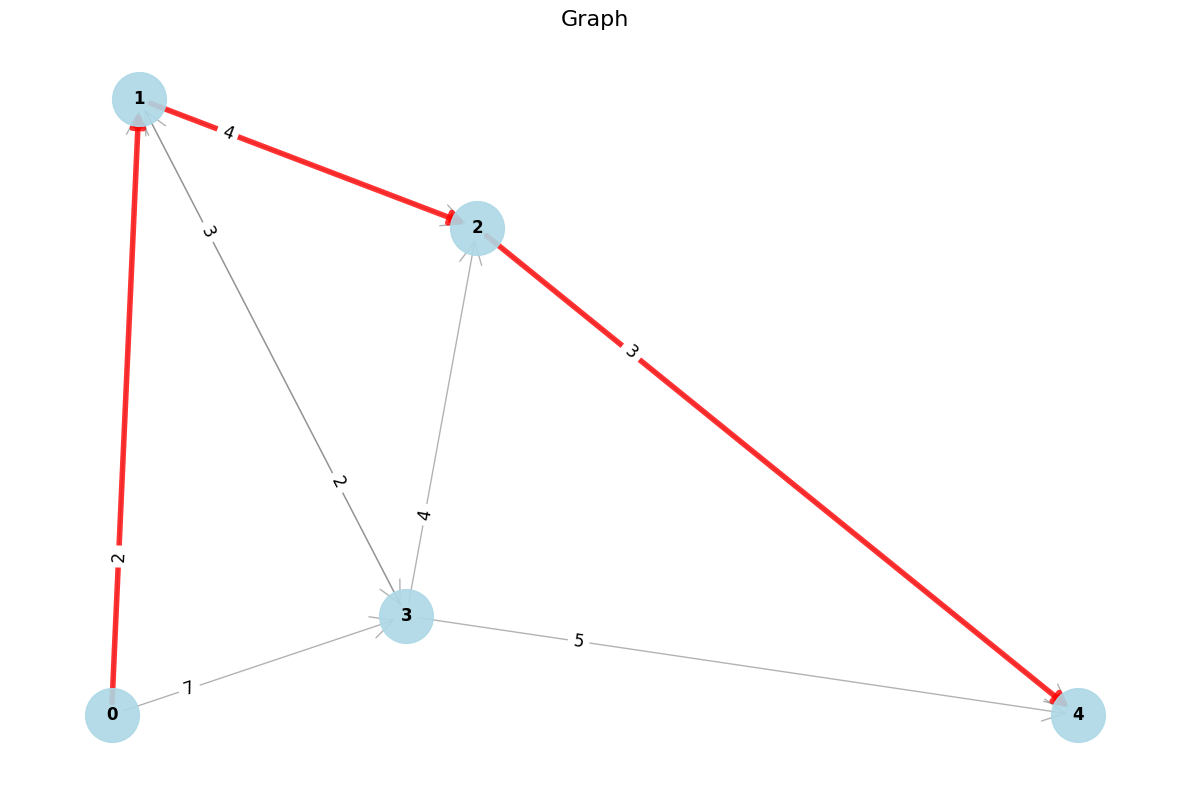

In [ ]:
adjacency_matrix = [
  [0, 2, INF, 7, INF],
  [INF, 0, 4, 3, INF],
  [INF, INF, 0, INF, 3],
  [INF, 2, 4, 0, 5],
  [INF, INF, INF, INF, 0],
]

adjacency_lists = to_adj_lists(adjacency_matrix)

res = dijkstra_b(adjacency_lists, 0)
route, d = get_path_route(res, 4)
print(route, d)

E = to_edges(adjacency_matrix)
draw_graph(E, route)

[(0, 2), (2, 9), (9, 11)] 9


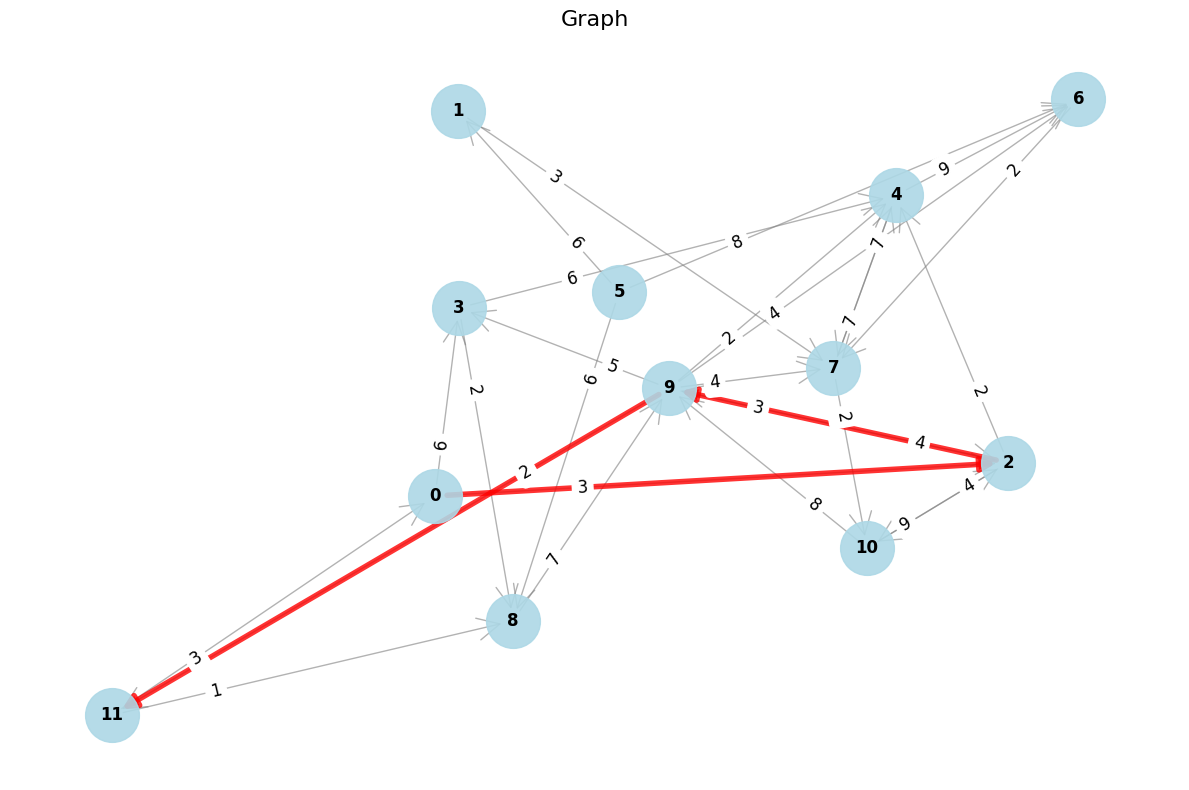

In [ ]:

random.seed(69)
N = 12
adjacency_matrix, E = generate_graph(N, p=0.2)
adjacency_lists = to_adj_lists(adjacency_matrix)

res = dijkstra_b(adjacency_lists, 0)
route, d = get_path_route(res, N-1)
print(route, d)

E = to_edges(adjacency_matrix)
draw_graph(E, route)

0 2 2 6 9 7 9 9 
3 0 7 5 3 4 9 2 
2 6 0 2 1 4 8 2 
5 9 5 0 2 5 8 8 
9 7 5 7 0 2 9 1 
8 3 6 4 7 0 4 8 
5 9 8 4 9 2 0 3 
9 2 8 9 9 6 7 0 
[(0, 1), (1, 7)] 4


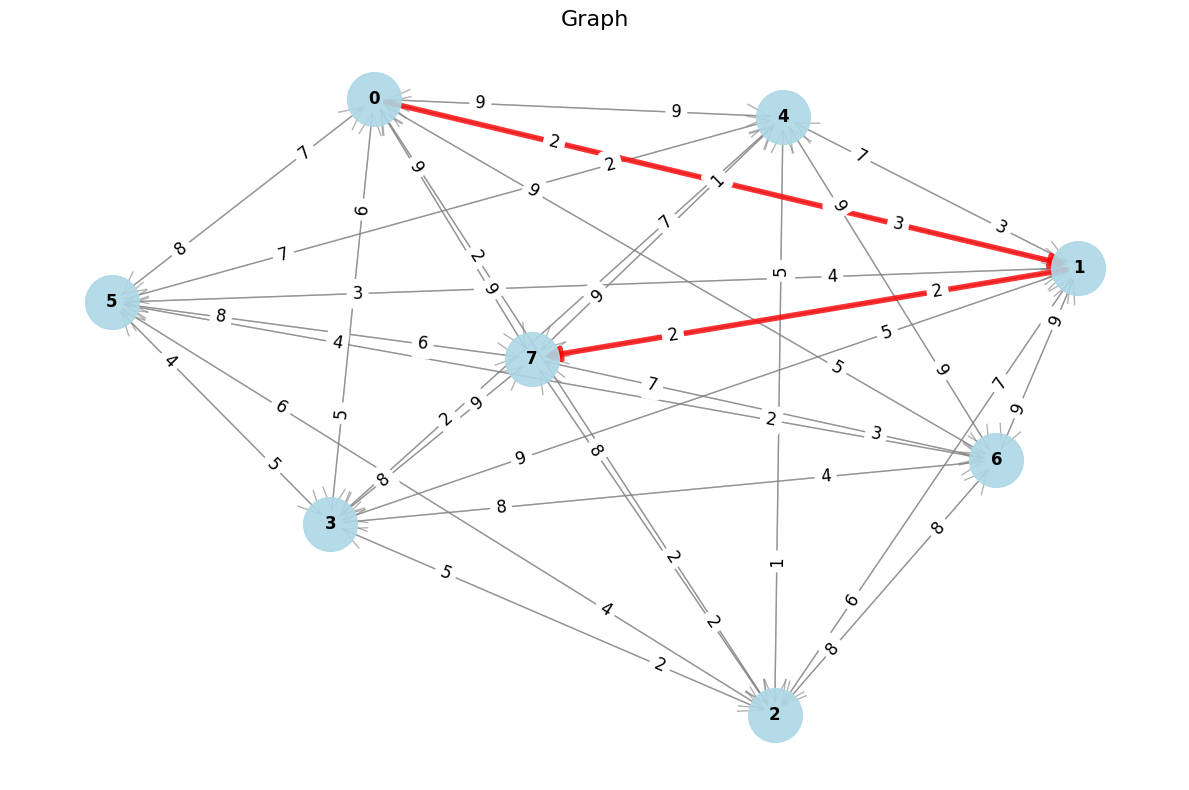

In [ ]:
random.seed(69)
N = 8
adjacency_matrix, E = generate_graph(N, p=1) # p=1 -> Complete Digraph
print_adjacency_matrix(adjacency_matrix)
adjacency_lists = to_adj_lists(adjacency_matrix)

res = dijkstra_b(adjacency_lists, 0)
route, d = get_path_route(res, N-1)
print(route, d)

E = to_edges(adjacency_matrix)
draw_graph(E, route)